In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns


## Data Introduction

The data utilized for this study is data pulled from three sources.

* Tokyo Olympics Dataset (Webscrapping)
* GDP Dataset (Webscrapping)
* Tokyo Olympics Dataset Teams (Kaggle)

For the class DS5100 in the Program for MSDS at University of Virginia, explored ways to analysis the data pulled from these three sources. From the sources we would like to find how many Gold Medals a nation will win based on features pulled from these datasets. Some features we will look at are number of silver and bronze medals, continent the countries reside in, GDP, Population, and GDP per Capita.

## Data Preparation
Although a pipeline was created we need to prepare the data to fit a multiple linear model as shown below

In [55]:
original = pd.read_csv('../../data/final_olympic_cont.csv', index_col=[0])

## Transform and drop some unused columns
# df = original.drop(['Total', 'Name', 'Country', 'GDP abbreviated', 'NOC'], axis=1)
df = original.drop(['Name', 'Gold', 'Silver', "Bronze",'Country', 'GDP abbreviated', 'NOC'], axis=1)
## Drop NaN
df = df.dropna()

# Transform Variable
df["GDP"] = df["GDP"].map(lambda x: int(x[1:].replace(",","")))
df["GDP per capita"] = df["GDP per capita"].map(lambda x: int(x[1:].replace(",","")))
df["Population"] = df["Population"].map(lambda x: int(x.replace(",","")))
df["GDP growth"] = df["GDP growth"].map(lambda x: x[:-1]).astype(float)
df.head()

,Total,GDP,GDP growth,Population,GDP per capita,Discipline,Continents
0,113,19485394000000,2.27,325084756,59939,47,North America
1,88,12237700479375,6.90,1421021791,8612,33,Asia
2,58,4872415104315,1.71,127502725,38214,48,Asia
3,65,2637866340434,1.79,66727461,39532,28,Europe
4,71,1578417211937,1.55,145530082,10846,34,Asia


In [59]:
df[["Total", "GDP", "GDP growth", "Population", "GDP per capita", "Discipline"]].corr()

,Total,GDP,GDP growth,Population,GDP per capita,Discipline
Total,1.000000,0.836197,-0.135795,0.405359,0.297602,0.867667
GDP,0.836197,1.000000,-0.004333,0.546556,0.228589,0.652206
GDP growth,-0.135795,-0.004333,1.000000,0.266695,-0.245838,-0.233841
Population,0.405359,0.546556,0.266695,1.000000,-0.145732,0.266549
GDP per capita,0.297602,0.228589,-0.245838,-0.145732,1.000000,0.377430
Discipline,0.867667,0.652206,-0.233841,0.266549,0.377430,1.000000


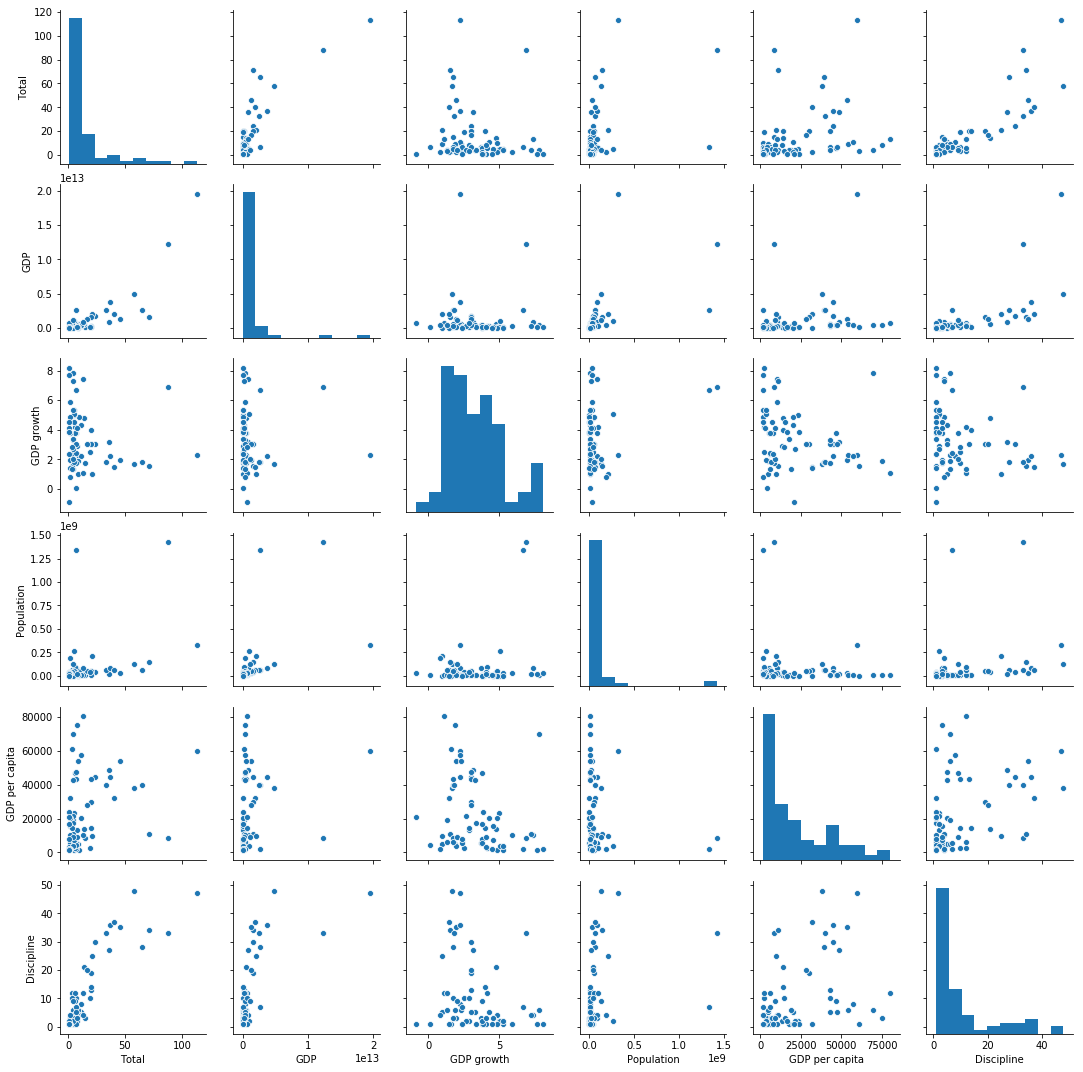

In [75]:
fig = sns.pairplot(df[["Total", "GDP", "GDP growth", "Population", "GDP per capita", "Discipline"]])
fig.savefig('../resources/correlation_plot_cont.png')

In [60]:
## Transform Categorical Variables
df = pd.get_dummies(df,drop_first=True)
df.head()

,Total,GDP,GDP growth,Population,GDP per capita,Discipline,Continents_Asia,Continents_Australia,Continents_Europe,Continents_North America,Continents_South America
0,113,19485394000000,2.27,325084756,59939,47,0,0,0,1,0
1,88,12237700479375,6.90,1421021791,8612,33,1,0,0,0,0
2,58,4872415104315,1.71,127502725,38214,48,1,0,0,0,0
3,65,2637866340434,1.79,66727461,39532,28,0,0,1,0,0
4,71,1578417211937,1.55,145530082,10846,34,1,0,0,0,0


In [62]:
## Attributes vs Response Variable
x = df.drop(['Total'],axis=1)
#separte the predicting attribute into Y for model training 
y = df['Total']

In [47]:
## Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Running a linear model

In [63]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
y_prediction =  LR.predict(x_test)
y_prediction

array([  9.43561509, 123.77521123,   6.23618446,  35.80669307,
        -4.51010293,   1.68990375,  31.80338024,   9.57692589,
         8.30945183,  10.04559066,   2.6185633 ,  41.16143162,
         4.13557129,  31.99326694,   4.31938391,   5.04427332,
         1.88649797,   5.52245348,   3.02310344,  24.10868412,
        22.62253932,  -7.2068649 ])

## Analysis of Linear Model
Statistics for the linear model performance

In [65]:
r_squared =r2_score(y_test,y_prediction)
print("R^2 = {}".format(r_squared))
mean_squared_error_val = mean_squared_error(y_test,y_prediction)
print("Mean Squared Error = {}".format(mean_squared_error_val))
rmse = np.sqrt(mean_squared_error(y_test,y_prediction))
print("Root Mean Squared Error = {}".format(rmse))

R^2 = 0.8479990568528668
Mean Squared Error = 109.1391895919251
Root Mean Squared Error = 10.446970354697342


## Side by Side comparison
Displayed in the Results of the testing set with the actual values.

In [66]:
display = original.copy()
display = display.iloc[x_test.index]
display["Prediction"] = y_prediction
display.head()

,Name,Gold,Silver,Bronze,Total,Country,GDP,GDP abbreviated,GDP growth,Population,GDP per capita,NOC,Discipline,Continents,Prediction
22,SWE Sweden,3,6,0,9,Sweden,"$535,607,385,506",$536 billion,2.29%,"9,904,896","$54,075",Sweden,6,Europe,9.435615
0,USA United States of America,39,41,33,113,United States,"$19,485,394,000,000",$19.485 trillion,2.27%,"325,084,756","$59,939",United States of America,47,North America,123.775211
51,POR Portugal,1,1,2,4,Portugal,"$219,308,128,887",$219 billion,2.68%,"10,288,527","$21,316",Portugal,2,Europe,6.236184
4,ROC ROC,20,28,23,71,Russia,"$1,578,417,211,937",$1.578 trillion,1.55%,"145,530,082","$10,846",ROC,34,Asia,35.806693
58,COL Colombia,0,4,1,5,Colombia,"$314,457,601,860",$314 billion,1.79%,"48,909,839","$6,429",Colombia,3,South America,-4.510103


## Side by Side Comparison

In [67]:
display[["Name", "Total", "Prediction"]]

,Name,Total,Prediction
22,SWE Sweden,9,9.435615
0,USA United States of America,113,123.775211
51,POR Portugal,4,6.236184
4,ROC ROC,71,35.806693
58,COL Colombia,5,-4.510103
18,KEN Kenya,10,1.689904
10,CAN Canada,24,31.803380
34,GRE Greece,4,9.576926
48,AUT Austria,7,8.309452
12,NZL New Zealand,20,10.045591


## Linear Model 

In [70]:
# get importance
importance = LR.coef_
# summarize feature importance
coeffiencts = []
for i,v in enumerate(importance):
    coeffiencts.append([x_train.columns[i],format(v, 'f')])
pd.DataFrame(coeffiencts, columns=['Feature', 'Coefficient']).sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
7,Continents_Europe,6.200415
8,Continents_North America,4.484664
5,Continents_Asia,3.548857
6,Continents_Australia,2.443772
4,Discipline,0.784625
0,GDP,0.000000
2,Population,0.000000
9,Continents_South America,-6.659379
1,GDP growth,-0.138194
3,GDP per capita,-0.000042
